### James Cooper | CSC 529 | Assignment 3

In [2]:
cd "C:/Users/James Cooper/Desktop/DePaul/Advanced Data Mining/Homework3"

C:\Users\James Cooper\Desktop\DePaul\Advanced Data Mining\Homework3


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline
%pylab inline
import seaborn as sns
from sklearn import preprocessing

Populating the interactive namespace from numpy and matplotlib


In [4]:
usps_data = pd.read_csv('uspsdata.txt', delimiter='\t', header=None)
usps_data.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.00,0.00,0.95,11.91,49.02,106.96,152.14,157.77,...,145.84,154.03,152.60,142.38,125.40,100.57,69.80,38.67,14.58,2.80
1,0.0,0.0,3.31,19.03,51.45,87.66,106.14,102.35,96.37,106.66,...,125.28,141.59,145.34,135.52,110.81,74.17,36.65,11.53,1.81,0.07
2,0.0,0.0,0.02,1.86,12.63,42.03,84.17,104.87,79.06,32.90,...,158.29,150.08,134.27,113.54,85.57,52.14,23.76,7.75,1.76,0.23
3,0.0,0.0,0.00,0.01,5.93,33.21,75.00,85.97,51.36,14.25,...,157.26,156.53,139.58,104.68,63.12,28.38,8.15,1.11,0.02,0.00
4,0.0,0.0,0.94,8.57,32.06,63.96,74.10,50.12,18.39,2.83,...,93.12,87.66,59.11,26.47,8.72,2.48,0.42,0.00,0.00,0.00


In [5]:
usps_labels = pd.read_csv('uspscl.txt', delimiter='\t', header=None)
usps_labels.head()
shape(usps_labels)

(200, 1)

### Problem 1

#### (Handwriting recognition using support vector machines) In this problem, you will apply a support vector machine to classify hand-written digits. Download the digit data set from the course documents for week 6. The zip archive contains two text files. The file uspsdata.txt contains a matrix with one digit/data point (= vector of length 256) per row. The 256-vector in each row represents a 16 by 16 image of a handwritten number. The file uspscl.txt contains the corresponding class labels. The data contains two classes, the digits 5 and 6, and the class labels are stored as -1 and +1, respectively. 

#### a. Train a linear SVM with soft margin. Vary the soft margin parameter and plot the classification error as a function of the margin parameter. Discuss the results.

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(usps_data, usps_labels, test_size=0.2, random_state=33)

C:\Users\James Cooper\Anaconda_9-17\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
from sklearn import svm
from sklearn.metrics import accuracy_score

scores_train_svc = []
scores_test_svc = []

for i in np.arange(0.1, 10, 1):
    
    clf = svm.SVC(kernel='linear', C=i)
    clf.fit(X_train, y_train)
    #clf.predict(X_test)
    
    y_val_train = y_train
    y_pred_train = clf.predict(X_train)
    
    y_val = y_test
    y_pred = clf.predict(X_test)
    
    scores_train = accuracy_score(y_val_train, y_pred_train)
    scores_train_svc.append(scores_train)
    
    scores_test = accuracy_score(y_val, y_pred)
    scores_test_svc.append(scores_test)

print(scores_train_svc)
print(scores_test_svc)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.97499999999999998, 0.97499999999999998, 0.97499999999999998, 0.97499999999999998, 0.97499999999999998, 0.97499999999999998, 0.97499999999999998, 0.97499999999999998, 0.97499999999999998, 0.97499999999999998]


In [8]:
n = np.arange(0.1, 10, 1)

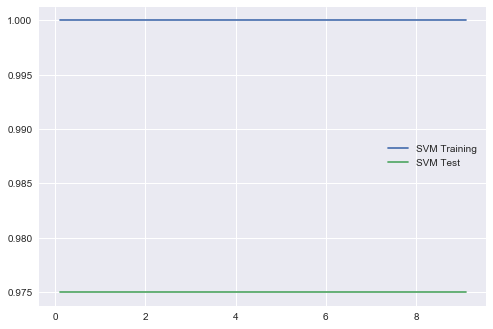

In [9]:
plt.plot(n, scores_train_svc, label='SVM Training')
plt.plot(n, scores_test_svc, label = 'SVM Test')
plt.legend()

#### b. Train a non-linear SVM with soft margin and Gaussian kernel. Vary both the soft margin parameter and the Gaussian kernel bandwidth (sigma) and plot the classification error as a function of the margin parameter and kernel bandwidth.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_usps_data = scaler.fit_transform(usps_data)

In [12]:
from sklearn.cross_validation import train_test_split
X_traing, X_testg, y_traing, y_testg = train_test_split(scaled_usps_data, usps_labels, test_size=0.2, random_state=45)

In [13]:
sigma =  {'1': 0.0001, '2':0.02, '3':0.01, '4':0.1, '5':0.05, '6':1}
gamma_vals = {'g1':1/sigma['1'], 'g2': 1/sigma['2'], 'g3':1/sigma['3'], 'g4':1/sigma['4'], 'g5':1/sigma['5']}

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

resubstitution_svc1 = []
generalization_svc1 = []

for i in np.arange(0.1, 10, 1):
    
    gclf = SVC(kernel='rbf', C=i, gamma=gamma_vals['g1'])
    gclf.fit(X_traing, y_traing.values.ravel())
    #clf.predict(X_test)
    
    gy_val_train = y_traing
    gy_pred_train = gclf.predict(X_traing)
    
    gy_val = y_testg
    gy_pred = gclf.predict(X_testg)
    
    gscores_train = accuracy_score(y_val_train, y_pred_train)
    training_error = 1 - gscores_train
    resubstitution_svc1.append(training_error)
    
    gscores_test = accuracy_score(y_val, y_pred)
    test_error = 1 - gscores_test
    generalization_svc1.append(test_error)

print(resubstitution_svc1)
print(generalization_svc1)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022]


In [15]:
resubstitution_svc2 = []
generalization_svc2 = []

for i in np.arange(0.1, 10, 1):
    
    gclf = SVC(kernel='rbf', C=i, gamma=gamma_vals['g2'])
    gclf.fit(X_traing, y_traing.values.ravel())
    #clf.predict(X_test)
    
    gy_val_train = y_traing
    gy_pred_train = gclf.predict(X_traing)
    
    gy_val = y_testg
    gy_pred = gclf.predict(X_testg)
    
    gscores_train = accuracy_score(y_val_train, y_pred_train)
    training_error1 = 1 - gscores_train
    resubstitution_svc2.append(training_error1)
    
    gscores_test = accuracy_score(y_val, y_pred)
    test_error1 = 1 - gscores_test
    generalization_svc2.append(test_error1)

print(resubstitution_svc2)
print(generalization_svc2)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022]


In [16]:
resubstitution_svc5 = []
generalization_svc5 = []

for i in np.arange(0.1, 10, 1):
    
    gclf = SVC(kernel='rbf', C=i, gamma=gamma_vals['g5'])
    gclf.fit(X_traing, y_traing)
    #clf.predict(X_test)
    
    gy_val_train = y_traing
    gy_pred_train = gclf.predict(X_traing)
    
    gy_val = y_testg
    gy_pred = gclf.predict(X_testg)
    
    gscores_train = accuracy_score(y_val_train, y_pred_train)
    training_error2 = 1 - gscores_train
    resubstitution_svc5.append(training_error2)
    
    gscores_test = accuracy_score(y_val, y_pred)
    test_error2 = 1 - gscores_test
    generalization_svc5.append(test_error2)

print(resubstitution_svc5)
print(generalization_svc5)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022, 0.025000000000000022]


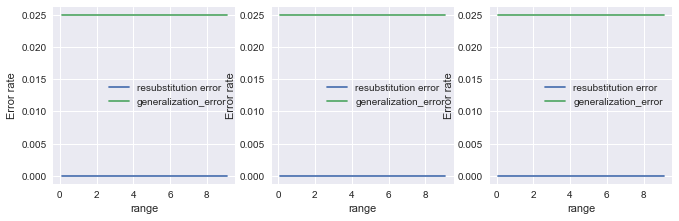

In [17]:
g_range = np.arange(0.1, 10, 1)
fig1 = plt.figure(figsize=[15,15])
n1 = fig1.add_subplot(4, 4, 1)
n2 = fig1.add_subplot(4, 4, 2)
n3 = fig1.add_subplot(4, 4, 3)

n1.plot(g_range, resubstitution_svc1,label="resubstitution error")
n1.plot(g_range, generalization_svc1,label="generalization_error")
n1.set_xlabel('range')
n1.set_ylabel('Error rate')
n1.legend()

n2.plot(g_range, resubstitution_svc2,label="resubstitution error")
n2.plot(g_range, generalization_svc2,label="generalization_error")
n2.set_xlabel('range')
n2.set_ylabel('Error rate')
n2.legend()

n3.plot(g_range, resubstitution_svc5,label="resubstitution error")
n3.plot(g_range, generalization_svc5,label="generalization_error")
n3.set_xlabel('range')
n3.set_ylabel('Error rate')
n3.legend()

Choosing the best parameters for the Classifier systematically with Grid Search:

In [18]:
from matplotlib.colors import Normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.arange(0.00001, 10, 1)
gamma_range = np.arange(0.00001, 10, 1)
grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(svm.SVC(), param_grid=grid, cv=cv)
grid.fit(X_train, y_train)

print('The best parameters are %s with a score of %0.2f'
     %(grid.best_params_, grid.best_score_))

The best parameters are {'C': 1.0000100000000001, 'gamma': 1.0000000000000001e-05} with a score of 0.91


In [32]:
gammas = np.logspace(-2, 1, 4)
cvals = np.logspace(-2, 1, 4)

In [ ]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
   
    ('svc', SVC()),
])

In [ ]:
#train_scores, test_scores = calc_params(X_traing, y_traing, clf, gammas, 'svc__gamma', 3)

#### c. After you have selected parameter values for both algorithms (in part a. and part b.), and trained each one with the parameter value you have chosen, compute the classification error on the test set. Report the test set estimates of the error for both cases along with the parameter values you have selected, and compare the two results. Is a linear SVM a good choice for this data, or should we use a non-linear one?

The testing accuracy for a Linear SVM with a 'C' value of 0.1

In [19]:
scores_test_svc = []

clf = svm.SVC(kernel='linear', C=0.1)
clf.fit(X_train, y_train)
    #clf.predict(X_test)
    
y_val_train = y_train
y_pred_train = clf.predict(X_train)
    
y_val = y_test
y_pred = clf.predict(X_test)
    
scores_test = accuracy_score(y_val, y_pred)
scores_n = 1 - scores_test
scores_test_svc.append(scores_n)


print(scores_test_svc)

[0.025000000000000022]


The testing accuracy of a Non-Linear SVM using the specified best parameters of 'C' = 1.0000100000000001 and Gamma = 1.0000000000000001e-05

In [20]:
resubstitution_svc5 = []
generalization_svc5 = []


    
gclf = SVC(kernel='rbf', C=1.0000100000001, gamma=1.000000000001e-05)
gclf.fit(X_traing, y_traing)
    #clf.predict(X_test)
    
gy_val = y_testg
gy_pred = gclf.predict(X_testg)
    
gscores_test = accuracy_score(y_val, y_pred)
test_error1 = 1 - gscores_test
generalization_svc5.append(test_error1)


print(generalization_svc5)

[0.025000000000000022]


#### d. For each method (linear and Gaussian), select five correctly and five incorrectly classified samples. Plot these as images like the one above. (Hint: To do so, you will have to write a 256-vector into a 16x16 matrix (function imresize.m) and plot this matrix as an image functions imshow.m and colormap(gray)) Can you see a qualitative difference between correctly classified and misclassified digits? Explain the results.

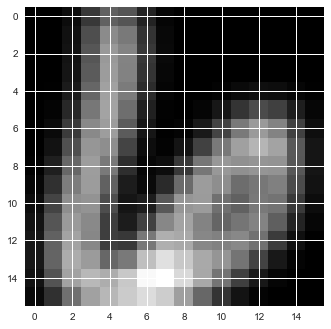

In [21]:
import matplotlib.image as mpimg

row1 = X_train[0:1]
row1 = row1.values
M = row1.reshape(16,16)

imgplot = plt.imshow(M, cmap='gray')

### Problem 2

#### (E-commerce Customer Identification using ensemble of classifiers)

#### The data of e-tailer customers is posted under the course documents for week 6. The training data contains 334 variables for a known set of 10,000 customers and non-customers with a ratio of 1:10, respectively. The test data consists of a set of examples and is drawn from the same distribution as the training set.  The feature data is train10000.csv and the label data is train10000_label.csv with corresponding labels for the records in train10000.csv.  The test10000.csv is the test data with corresponding labels for the records in test10000-label.csv. 

#### Preprocessing steps to do:
#### •	Missing values: Check if there is any missing values inside the dataset, if so, perform an analysis to determine if you can ignore the cases with missing data.  If you cannot ignore the missing data, fill in the missing values and explain the method that you used. 
#### •	Normalization:  since the features have very different value ranges, apply a normalization procedure to make the features comparable (be on the same scale).
#### •	Attribute/Feature selection:  Since there are 334 features in the dataset, it may be useful to use some feature/attribute selection to reduce the dataset before training classifiers. Describe your selected method and explain how it works briefly.
#### •	Balanced data: The dataset is a severely unbalanced dataset. You may want to balance the data before training the classifier. Describe your selected method to balance the data. 


In [62]:
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import Imputer
import seaborn as sns
import pylab


data_train = pd.read_csv('train10000.csv', delimiter=',',na_values='nan', header=None)
data_train_labels = pd.read_csv('train10000_Label.csv', delimiter=',',na_values='nan', header=None)
data_test = pd.read_csv('test10000.csv', delimiter=',',na_values='nan', header=None)
data_test_labels = pd.read_csv('test10000_label.csv', delimiter=',',na_values='nan', header=None)

In [39]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 334 entries, 0 to 333
dtypes: float64(13), int64(321)
memory usage: 25.5 MB


In [40]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,...,324,325,326,327,328,329,330,331,332,333
0,999000.0,46,2.0,46,196000.0,2.0,999000.0,4.0,3.0,999000.0,...,59,19,99,21,6,8,11,27,254,110
1,1.0,50,1.0,50,196000.0,1.0,4.0,7.0,5.0,1.0,...,51,24,89,13,11,2,10,30,169,144
2,999000.0,50,1.0,50,196000.0,1.0,4.0,999000.0,7.0,999000.0,...,61,20,98,17,7,2,10,24,337,105
3,1.0,58,1.0,58,195000.0,2.0,4.0,999000.0,8.0,2.0,...,50,19,83,12,8,4,4,31,280,165
4,999000.0,64,1.0,64,196000.0,1.0,4.0,2.0,2.0,999000.0,...,57,23,99,22,4,8,44,27,143,12


In [41]:
data_train.values

array([[  9.99000000e+05,   4.60000000e+01,   2.00000000e+00, ...,
          2.70000000e+01,   2.54000000e+02,   1.10000000e+02],
       [  1.00000000e+00,   5.00000000e+01,   1.00000000e+00, ...,
          3.00000000e+01,   1.69000000e+02,   1.44000000e+02],
       [  9.99000000e+05,   5.00000000e+01,   1.00000000e+00, ...,
          2.40000000e+01,   3.37000000e+02,   1.05000000e+02],
       ..., 
       [  1.00000000e+00,   5.40000000e+01,   1.00000000e+00, ...,
          3.20000000e+01,   3.31000000e+02,   1.14000000e+02],
       [  9.99000000e+05,   4.40000000e+01,   1.00000000e+00, ...,
          1.20000000e+01,   3.28000000e+02,   1.43000000e+02],
       [  9.99000000e+05,   4.60000000e+01,   9.99000000e+05, ...,
          1.80000000e+01,   2.23000000e+02,   1.83000000e+02]])

In [42]:
rows, columns = data_train.shape
print data_train.shape

(10000, 334)


In [44]:
rows, columns = data_test.shape
print data_test.shape

(10000, 334)


### Check for Missing Values

In [45]:
## Get basic statistics for continuous features
numeric = data_train.describe(include=['number']).T.reset_index()
numeric.rename(columns={'index':'feature'},inplace=True)
numeric.insert(1,'missing',(rows - numeric['count'])/ float(rows))
numeric

,feature,missing,count,mean,std,min,25%,50%,75%,max
0,0,0.0,10000.0,520579.2288,499079.648645,0.0,1.00,999000.0,999000.00,999000.0
1,1,0.0,10000.0,46.6708,9.257170,18.0,46.00,46.0,46.00,99.0
2,2,0.0,10000.0,243557.5701,428964.747884,1.0,1.00,1.0,7.00,999000.0
3,3,0.0,10000.0,46.8831,10.578271,18.0,42.00,46.0,52.00,99.0
4,4,0.0,10000.0,196027.3000,950.497267,190000.0,196000.00,196000.0,196000.00,199000.0
5,5,0.0,10000.0,239960.8596,426798.361930,1.0,1.00,2.0,2.00,999000.0
6,6,0.0,10000.0,430870.8259,494785.452455,1.0,4.00,4.0,999000.00,999000.0
7,7,0.0,10000.0,706594.0515,454567.505278,1.0,8.00,999000.0,999000.00,999000.0
8,8,0.0,10000.0,302101.4378,458858.669779,1.0,5.00,7.0,999000.00,999000.0
9,9,0.0,10000.0,542557.5240,497664.991029,1.0,1.00,999000.0,999000.00,999000.0


In [46]:
## Examine features with count missing > 0
numeric[numeric['missing']>0]

,feature,missing,count,mean,std,min,25%,50%,75%,max


In [47]:
## Get basic statistics for continuous features
numeric1 = data_test.describe(include=['number']).T.reset_index()
numeric1.rename(columns={'index':'feature'},inplace=True)
numeric1.insert(1,'missing',(rows - numeric['count'])/ float(rows))
numeric1

,feature,missing,count,mean,std,min,25%,50%,75%,max
0,0,0.0,10000.0,523113.7876,498903.221672,0.0,1.0,998880.0,998880.00,998880.0
1,1,0.0,10000.0,46.6103,9.306336,18.0,46.0,46.0,46.00,99.0
2,2,0.0,10000.0,237535.0535,425279.685549,1.0,1.0,1.0,6.00,998880.0
3,3,0.0,10000.0,46.7921,10.692582,18.0,42.0,46.0,52.00,99.0
4,4,0.0,10000.0,196012.9900,949.098856,190100.0,196000.0,196010.0,196110.00,199110.0
5,5,0.0,10000.0,228544.8079,419610.120297,1.0,1.0,2.0,2.00,998880.0
6,6,0.0,10000.0,420730.4115,493221.337666,1.0,4.0,4.0,998880.00,998880.0
7,7,0.0,10000.0,709405.8966,453181.921680,1.0,8.0,998880.0,998880.00,998880.0
8,8,0.0,10000.0,290278.4464,453550.895657,1.0,5.0,7.0,998880.00,998880.0
9,9,0.0,10000.0,540694.3683,497757.514610,1.0,1.0,998880.0,998880.00,998880.0


In [48]:
## Examine features with count missing > 0
numeric1[numeric1['missing']>0]

,feature,missing,count,mean,std,min,25%,50%,75%,max


In [49]:
data_train.isnull().any()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
304    False
305    False
306    False
307    False
308    False
309    False
310    False
311    False
312    False
313    False
314    False
315    False
316    False
317    False
318    False
319    False
320    False
321    False
322    False
323    False
324    False
325    False
326    False
327    False
328    False
329    False
330    False
331    False
332    False
333    False
Length: 334, dtype: bool

In [50]:
data_test.isnull().any()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
304    False
305    False
306    False
307    False
308    False
309    False
310    False
311    False
312    False
313    False
314    False
315    False
316    False
317    False
318    False
319    False
320    False
321    False
322    False
323    False
324    False
325    False
326    False
327    False
328    False
329    False
330    False
331    False
332    False
333    False
Length: 334, dtype: bool

We can see that our data is very imbalanced. The majority class is 0 in both the training and test sets. This is going to cause a large amount of overfitting of the majority class. 

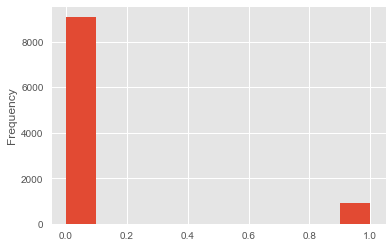

In [63]:
data_train_labels.iloc[:,0].plot(kind='hist')

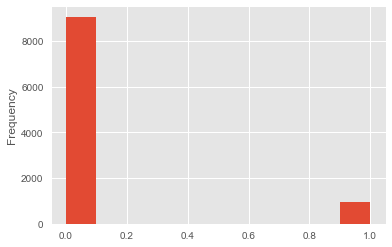

In [64]:
data_test_labels.iloc[:,0].plot(kind='hist')

### Normalization

First we will normalize the data in order to scale our data, it appears that there is a wide range of scales here with some attributes having ranges as small as 0 to 1 and others from 0 to 999000.0

In [53]:
scaler_train = StandardScaler()
scaled_data_train = scaler_train.fit_transform(data_train)

In [54]:
scaled_data_train

array([[ 0.95865399, -0.07246637, -0.56780365, ...,  0.72306558,
        -0.18483915, -0.66374284],
       [-1.04312861,  0.35965273, -0.56780598, ...,  1.05977189,
        -0.86638465, -0.27401319],
       [ 0.95865399,  0.35965273, -0.56780598, ...,  0.38635927,
         0.48066999, -0.72105603],
       ..., 
       [-1.04312861,  0.79177183, -0.56780598, ...,  1.28424277,
         0.43256089, -0.6178923 ],
       [ 0.95865399, -0.28852593, -0.56780598, ..., -0.96046598,
         0.40850635, -0.28547583],
       [ 0.95865399, -0.07246637,  1.76117084, ..., -0.28705335,
        -0.4334028 ,  0.17302965]])

In [55]:
scaler_test = StandardScaler()
scaled_data_test = scaler_test.fit_transform(data_test)

In [56]:
scaled_data_test

array([[-1.04857801, -1.1401727 , -0.55855932, ..., -0.7053735 ,
         0.51756473, -0.60271938],
       [-1.04858001, -1.1401727 , -0.55856402, ..., -1.70392037,
        -0.11719622,  0.36309071],
       [ 0.95367194, -0.06558225, -0.55856402, ..., -0.81632316,
         1.06717483, -0.27739387],
       ..., 
       [ 0.95367194, -0.06558225,  1.79031128, ...,  0.40412301,
         0.44015486,  1.237403  ],
       [-1.04857801, -0.92525461, -0.55855226, ..., -1.37107141,
        -0.05526833,  0.18009512],
       [-1.04857801, -1.1401727 , -0.55856402, ..., -0.37252455,
        -0.02430438, -0.37905809]])

### Feature Selection

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
sel = SelectKBest(f_classif, k=200).fit(data_train, data_train_labels)
#x_new = sel.transform(scaled_data_train)
#scores = sel.scores_
sel.fit(scaled_data_train, data_train_labels)

SelectKBest(k=200, score_func=<function f_classif at 0x000000000E3D3898>)

In [76]:
sel.transform(scaled_data_train).shape

(10000L, 200L)

In [77]:
sel.scores_

array([  4.56539029e+00,   9.98619907e+01,   5.00670732e+00,
         9.03267692e+01,   7.76235142e+01,   1.81950225e+01,
         2.09170069e+01,   2.47030636e+01,   7.80754400e+00,
         2.87491086e+01,   1.80922557e+01,   6.64476760e+00,
         2.02025004e+01,   8.37813900e+00,   4.56538868e+00,
         1.74163749e+00,   1.89140080e+01,   3.27897422e+01,
         5.51664985e+00,   8.32382717e+01,   4.53518512e+01,
         1.02396234e-01,   4.38504875e+01,   1.87168884e+00,
         3.84809432e+01,   3.04116037e-01,   2.49940827e+00,
         1.20994130e+01,   1.20434754e+01,   1.67284891e+01,
         6.87801815e+00,   3.68592832e+01,   5.74020451e+01,
         3.25073201e+01,   5.16058048e+01,   5.34265399e+00,
         7.01254973e-01,   9.83835057e-03,   7.99275162e-02,
         4.92857986e+00,   2.26313205e+00,   1.55132378e+01,
         2.75437736e+01,   3.73635786e+00,   7.44758409e+01,
         3.93966228e+01,   2.85370976e+01,   2.87251781e+01,
         3.25898597e+01,

In [74]:
import heapq
heapq.nlargest(2, range(len(sel.scores_)), sel.scores_.take)

[295, 294]

### Classification using raw and balanced data

Here two classification methods are used - Random Forest and Decision Trees, a comparison of the raw and scaled data unbalanced and balanced using the SMOTE method to over-sample the data are used. The accuracy scores, precision and recall results as well as f1 scores are examined below.

In [ ]:
sys.executable

In [ ]:
%pip install imbalanced-learn

In [ ]:
import scipy
print('scipy: %s' % scipy.__version__)

In [ ]:
import numpy
print('numpy: %s' % numpy.__version__)

In [ ]:
sys.executable

In [92]:
from collections import Counter
from imblearn.datasets import fetch_datasets
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [135]:
def print_results(headline, true_value, pred):
    print(headline)
    print('accuracy: {}'.format(accuracy_score(true_value, pred)))
    print('precision: {}'.format(precision_score(true_value, pred)))
    print('recall: {}'.format(recall_score(true_value, pred)))
    print('f1: {}'.format(f1_score(true_value, pred)))
    
classifier = RandomForestClassifier()

#raw data
pipeline = make_pipeline(classifier)
model = pipeline.fit(data_train, data_train_labels)
prediction = model.predict(data_test)

#raw balanced data using SMOTE
smote_pipeline = make_pipeline_imb(SMOTE(), classifier)
smote_model = smote_pipeline.fit(data_train, data_train_labels)
smote_prediction = smote_model.predict(data_test)

#Scaled data
pipeline_scaledr = make_pipeline(classifier)
model_scaledr = pipeline_scaledr.fit(scaled_data_train, data_train_labels)
prediction_scaledr = model_scaledr.predict(scaled_data_test)

#Scaled data using SMOTE
smote_pipeline_scaledr = make_pipeline_imb(SMOTE(), classifier)
smote_model_scaledr = smote_pipeline_scaledr.fit(scaled_data_train, data_train_labels)
smote_prediction_scaledr = smote_model_scaledr.predict(scaled_data_test)

print'\n'
print('raw data distribution: {}'.format(Counter(data_train_labels[0])))
X_smote, y_smote = SMOTE().fit_sample(data_train, data_train_labels[0])
print('SMOTE data distribution: {}'.format(Counter(y_smote)))
print'\n'


print(classification_report(data_test_labels, prediction))
print(classification_report_imbalanced(data_test_labels, smote_prediction))

print'\n'
print('Raw Pipeline Score {}'.format(pipeline.score(data_test, data_test_labels)))
print('SMOTE Pipeline Score {}'.format(smote_pipeline.score(data_test, data_test_labels)))

print'\n'
print_results('raw classification', data_test_labels, prediction)
print'\n'
print_results('SMOTE classification', data_test_labels, smote_prediction)
print'\n'
print_results('Scaled Data Classification', data_test_labels, prediction_scaledr)
print'\n'
print_results('SMOTE Scaled Classification', data_test_labels, smote_prediction_scaledr)



raw data distribution: Counter({0: 9091, 1: 909})
SMOTE data distribution: Counter({0: 9091, 1: 9091})


             precision    recall  f1-score   support

          0       0.91      0.98      0.94      9061
          1       0.13      0.02      0.04       939

avg / total       0.83      0.89      0.86     10000

                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.95      0.08      0.93      0.28      0.08      9061
          1       0.15      0.08      0.95      0.10      0.28      0.07       939

avg / total       0.84      0.87      0.16      0.85      0.28      0.08     10000



Raw Pipeline Score 0.9053
SMOTE Pipeline Score 0.9053


raw classification
accuracy: 0.894
precision: 0.128834355828
recall: 0.0223642172524
f1: 0.038112522686


SMOTE classification
accuracy: 0.8689
precision: 0.145038167939
recall: 0.0809371671991
f1: 0.103896103896


Scaled Data Classification
accuracy: 0.8926
precision: 0.135135135135


In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score


def print_results(headline, true_value, pred):
    print(headline)
    print('accuracy: {}'.format(accuracy_score(true_value, pred)))
    print('precision: {}'.format(precision_score(true_value, pred)))
    print('recall: {}'.format(recall_score(true_value, pred)))
    print('f1: {}'.format(f1_score(true_value, pred)))
    
classifier_tree = DecisionTreeClassifier()

#raw data
pipeline = make_pipeline(classifier_tree)
model = pipeline.fit(data_train, data_train_labels)
prediction = model.predict(data_test)

#raw balanced data using SMOTE
smote_pipeline = make_pipeline_imb(SMOTE(), classifier_tree)
smote_model = smote_pipeline.fit(data_train, data_train_labels)
smote_prediction = smote_model.predict(data_test)

#Scaled data
pipeline_scaled = make_pipeline(classifier_tree)
model_scaled = pipeline_scaled.fit(scaled_data_train, data_train_labels)
prediction_scaled = model_scaled.predict(scaled_data_test)

#Scaled data using SMOTE
smote_pipeline_scaled = make_pipeline_imb(SMOTE(), classifier_tree)
smote_model_scaled = smote_pipeline_scaled.fit(scaled_data_train, data_train_labels)
smote_prediction_scaled = smote_model_scaled.predict(scaled_data_test)


print'\n'
print('Raw Data Distribution: {}'.format(Counter(data_train_labels[0])))
X_smote, y_smote = SMOTE().fit_sample(data_train, data_train_labels[0])
print('SMOTE Data Distribution: {}'.format(Counter(y_smote)))
print'\n'


print(classification_report(data_test_labels, prediction))
print(classification_report_imbalanced(data_test_labels, smote_prediction))
print(classification_report(data_test_labels, prediction_scaled))
print(classification_report_imbalanced(data_test_labels, smote_prediction_scaled))

print'\n'
print('Raw Pipeline Score {}'.format(pipeline.score(data_test, data_test_labels)))
print('SMOTE Pipeline Score {}'.format(smote_pipeline.score(data_test, data_test_labels)))
print('Scaled Pipeline Score {}'.format(smote_pipeline_scaled.score(scaled_data_test, data_test_labels)))

print'\n'
print_results('Raw Classification', data_test_labels, prediction)
print'\n'
print_results('SMOTE Classification on Raw Data', data_test_labels, smote_prediction)
print'\n'
print_results('Scaled Data Classification', data_test_labels, prediction_scaled)
print'\n'
print_results('SMOTE Scaled Classification', data_test_labels, smote_prediction_scaled)



Raw Data Distribution: Counter({0: 9091, 1: 909})
SMOTE Data Distribution: Counter({0: 9091, 1: 9091})


             precision    recall  f1-score   support

          0       0.91      0.90      0.90      9061
          1       0.14      0.16      0.15       939

avg / total       0.84      0.83      0.83     10000

                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.87      0.17      0.89      0.38      0.16      9061
          1       0.12      0.17      0.87      0.14      0.38      0.14       939

avg / total       0.84      0.81      0.23      0.82      0.38      0.15     10000

             precision    recall  f1-score   support

          0       0.91      0.87      0.89      9061
          1       0.14      0.20      0.16       939

avg / total       0.84      0.81      0.82     10000

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.07      0.92  

It can be seen that in both classifiers, using SMOTE on the normalized data has a drastic effect on the recall. It also gets a better recall score on the raw data as well. The counter function above illustrates how SMOTE evens the data with over-sampling - the classes are equalized at 9,091 instances and class 1 can now be analyzed alongside class 0 much more evenly. The overall accuracy and precision suffer, but the recall is much improved. 